## Simple Linear Regression

### Objective: To predict the disease progression based on patient's BMI

In [1]:
# Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

SEED = 42
np.random.seed(SEED)

### Loading the Data
We are loading the diabetes dataset directly from scikit-learn toy dataset library

In [2]:
# Load the diabetes dataset
df_X, df_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

### Step 1: Initial EDA & Data Preparation

In [3]:
# Contcatenating independent variables and dependent variables into a single DataFrame
df = pd.concat([df_X, df_y], axis=1)

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# Setting up an example to demonstrate simple linear regression, 
# thus keeping only 'bmi' as the independent variable 
# and 'target'/'disease_progress' as the dependent variable

df = df[['bmi', 'target']]
df.columns = ['bmi', 'disease_progress']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               442 non-null    float64
 1   disease_progress  442 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [7]:
df.head(10)

,bmi,disease_progress
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
5,-0.040696,97.0
6,-0.047163,138.0
7,-0.001895,63.0
8,0.061696,110.0
9,0.039062,310.0


### Step 2: EDA & Data Preprocessing
* What values do you see?
* What distributions do you see?
* What relationships do you see?
* What relationships do you think might benefit the prediction problem?
* What ideas about the domain does the data spark?

In [8]:
df.columns

Index(['bmi', 'disease_progress'], dtype='object')

In [9]:
df.head()

,bmi,disease_progress
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [10]:
df.tail()

,bmi,disease_progress
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0
441,-0.073030,57.0


In [11]:
df.sample(5)

,bmi,disease_progress
287,-0.006206,219.0
211,0.036907,70.0
72,-0.004050,202.0
321,0.051996,230.0
73,-0.020218,111.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               442 non-null    float64
 1   disease_progress  442 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [13]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
df.describe()

,bmi,disease_progress
count,4.420000e+02,442.000000
mean,-8.045349e-16,152.133484
std,4.761905e-02,77.093005
min,-9.027530e-02,25.000000
25%,-3.422907e-02,87.000000
50%,-7.283766e-03,140.500000
75%,3.124802e-02,211.500000
max,1.705552e-01,346.000000


In [14]:
df_na = df.isna().sum()
df_na
# this will show only features that have nonzero missing values
# df_na[df_na!=0]

bmi                 0
disease_progress    0
dtype: int64

In [15]:
# limit to categorical data using df.select_dtypes()
df_cat = df.select_dtypes(include=['object'])
df_cat.nunique()

Series([], dtype: float64)

In [16]:
# limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

bmi                 163
disease_progress    214
dtype: int64

In [17]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df_num.corr()

,bmi,disease_progress
bmi,1.00000,0.58645
disease_progress,0.58645,1.00000


In [18]:
# df['median_house_value'].nlargest()
# df['median_house_value'].nsmallest()

In [19]:
# df['median_house_value'].value_counts()

In [20]:
# df['median_house_value'].unique()

In [21]:
# df.groupby(by='bmi').count().sort_values('disease_progress', ascending=False).head(10)

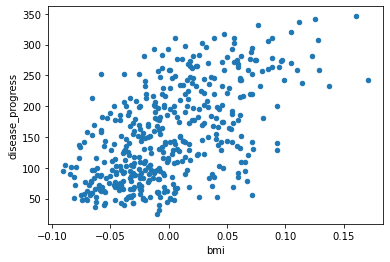

In [22]:
_ = df.plot.scatter('bmi', 'disease_progress')

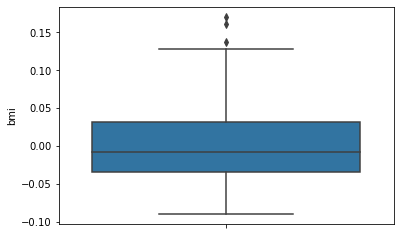

In [23]:
# Boxplot using Matplotlib
# _ = plt.boxplot(df['bmi'])
#
# Boxplot using Pandas DataFrame
# _ = df.boxplot(column=['bmi'])
#
# Boxplot using Seaborn
_ = sns.boxplot(y='bmi', data=df)

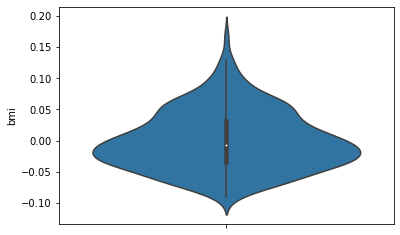

In [24]:
# Violin plot using Seaborn
_ = sns.violinplot(y='bmi', data=df)

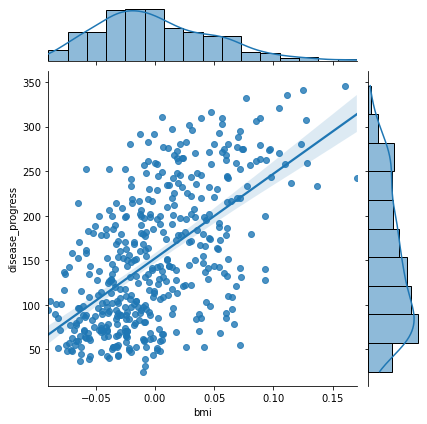

In [25]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x="bmi", y="disease_progress", data=df, kind="reg")

### Step 3: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [26]:
# 1)

X = df.iloc[:,0].values.reshape(-1,1) # input
y = df.iloc[:,1].values # output (dependent variable)

In [27]:
# 2) Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=False, random_state=SEED)

### Step 4: Training the model

In [28]:
# Import the linear regression algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

### Step 5: Visualize the trained model

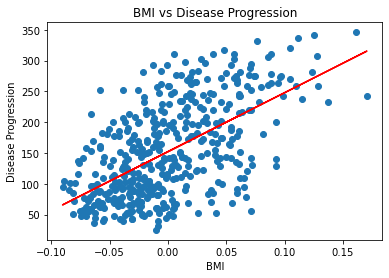

In [29]:
# y=mx+c (Linear regression model)
line = regressor.coef_*X + regressor.intercept_

# Lets plot this on the scatter plot
plt.scatter(X,y)
plt.plot(X,line, 'r')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("BMI vs Disease Progression")
plt.show()

### Step 6: Testing the model

In [30]:
# Kept aside some data to test - X_test
y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [31]:
compare_df

,Desired Output (Actuals),Predicted Output
0,109.0,98.624465
1,272.0,195.659488
2,60.0,143.012827
3,54.0,120.302502
4,221.0,199.788638
...,...,...
84,178.0,170.884588
85,104.0,136.819102
86,132.0,136.819102
87,220.0,189.465763


### Step 7: Evaluate the model

In [32]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Two alternate string formatting methods
# print('Coefficient of determination: {:.2f}'.format(r2_score(y_test, y_pred)))
# print(f'Coefficient of determination: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [957.76202681]
Mean squared error: 4079.82
Coefficient of determination: 0.36


In [33]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(regressor.score(X_test, y_test)))

Regression model's training score = 0.34
Regression model's test score     = 0.36


In [34]:
# The linear regression score function is actually the R2 (coefficient of determnination) score
# => R2 = 1 - (RSS/TSS)
# => where RSS = Residual Sum of Squares = ((y_test - y_pred)^2).sum()
# => 2and TSS = Total Sum of Squares = ((y_test - y_test.mean())^2).sum()
#
# Manual calculation:
# rss = np.square((y_test - y_pred)).sum()
# tss = np.square(y_test - y_test.mean()).sum()
# r2 = 1 - rss/tss
#
# Using built-in metric function in scikit-learn library:
# metrics.r2_score(y_test, regressor.predict(X_test))

### Step 8: My own prediction

In [36]:
own_pred = regressor.predict([[0.006]])
print("My target value is = ", str(own_pred[0]))

My target value is =  157.80008830519037


### End of this notebook